In [35]:
from pykml import parser
import pandas as pd
import numpy as np
import requests
# Parse the KML file
with open('D74.kml', 'r') as kml_file:
    kml_doc = parser.parse(kml_file).getroot()
altitudeMode = kml_doc.Document.Placemark.getchildren()[2].getchildren()[0]


attributes = kml_doc.findall(

    ".//{http://www.google.com/kml/ext/2.2}SimpleArrayData")

times = list(kml_doc.getchildren()[0].Placemark.getchildren()[2].findall(
    ".//{http://www.opengis.net/kml/2.2}when"))
coords = list(kml_doc.getchildren()[0].Placemark.getchildren()[2].findall(
    ".//{http://www.google.com/kml/ext/2.2}coord"))
print(len(times), " times loaded")
print(len(coords), " coordinates loaded")
acc_horiz = []
acc_vert = []
course = []
speed_kts = []
altitude = []
bank = []
pitch = []
for param in attributes:
    if param.get("name") == 'acc_horiz':
        for attr in param.getchildren():
            acc_horiz.append(attr.text)
    elif param.get("name") == 'acc_vert':
        for attr in param.getchildren():
            acc_vert.append(attr.text)
    elif param.get("name") == 'course':
        for attr in param.getchildren():
            course.append(attr.text)
    elif param.get("name") == 'speed_kts':
        for attr in param.getchildren():
            speed_kts.append(attr.text)
    elif param.get("name") == 'altitude':
        for attr in param.getchildren():
            altitude.append(attr.text)
    elif param.get("name") == 'bank':
        for attr in param.getchildren():
            bank.append(attr.text)
    elif param.get("name") == 'pitch':
        for attr in param.getchildren():
            pitch.append(attr.text)


times = [str(t) for t in times]
coords = [str(c) for c in coords]

print("Altitude Mode:", altitudeMode)
print(len(bank))
print(len(pitch))
print(len(altitude))
print(len(speed_kts))
print(len(course))
print(len(acc_vert))
print(len(acc_horiz))


7935  times loaded
7935  coordinates loaded
Altitude Mode: absolute
7935
7935
7935
7935
7935
7935
7935


In [36]:
data = [times, coords, bank, pitch, altitude, speed_kts, course, acc_horiz, acc_vert]

# Transpose the array using the zip() function
data = [list(x) for x in zip(*data)]

data = pd.DataFrame(data, columns =  ['times', 'coords', 'bank', 'pitch', 'altitude', 'speed_kts', 'course', 'acc_horiz', 'acc_vert'])

data[['longitude', 'latitude', 'height']] = data['coords'].str.split(' ', expand=True)

data.drop('coords', axis=1, inplace=True)

data['timestamp'] = pd.to_datetime(data['times'])
data['bank'] = data['bank'].astype(float)
data['pitch'] = data['pitch'].astype(float)
data['altitude'] = data['altitude'].astype(float)
data['speed_kts'] = data['speed_kts'].astype(float)
data['course'] = data['course'].astype(float)

data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)


data['height'] = data['height'].astype(float)

for i in range(len(data["height"])):
    if data["height"][i] < 0:
        data["height"][i] = 0

data['acc_horiz'] = data['acc_horiz'].astype(int)
data['acc_vert'] = data['acc_vert'].astype(int)

data.set_index('timestamp', inplace=True)
data

C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\3625587435.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["height"][i] = 0


,times,bank,pitch,altitude,speed_kts,course,acc_horiz,acc_vert,longitude,latitude,height
timestamp,,,,,,,,,,,
2023-09-02 19:22:23.252193927+00:00,2023-09-02T19:22:23.252193927Z,NaN,NaN,47.06,0.00,-1.00,78,9,-76.566126,38.940666,14.3
2023-09-02 19:22:26.916180133+00:00,2023-09-02T19:22:26.916180133Z,NaN,NaN,47.06,0.00,-1.00,78,9,-76.566126,38.940666,14.3
2023-09-02 19:22:28.039920091+00:00,2023-09-02T19:22:28.039920091Z,NaN,NaN,47.06,8.28,305.86,47,256,-76.566005,38.941265,0.0
2023-09-02 19:22:29.984860897+00:00,2023-09-02T19:22:29.984860897Z,NaN,NaN,55.25,8.28,160.66,13,16,-76.566025,38.941229,16.8
2023-09-02 19:22:30.994791030+00:00,2023-09-02T19:22:30.994791030Z,NaN,NaN,26.26,0.00,0.00,8,12,-76.566000,38.941294,8.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-02 21:47:28.000387191+00:00,2023-09-02T21:47:28.000387191Z,NaN,NaN,34.23,0.00,307.27,3,3,-76.565083,38.940796,10.4
2023-09-02 21:47:29.000374794+00:00,2023-09-02T21:47:29.000374794Z,NaN,NaN,34.31,0.00,307.27,3,3,-76.565083,38.940796,10.5
2023-09-02 21:47:30.000366687+00:00,2023-09-02T21:47:30.000366687Z,NaN,NaN,34.28,0.00,307.27,3,3,-76.565083,38.940796,10.4


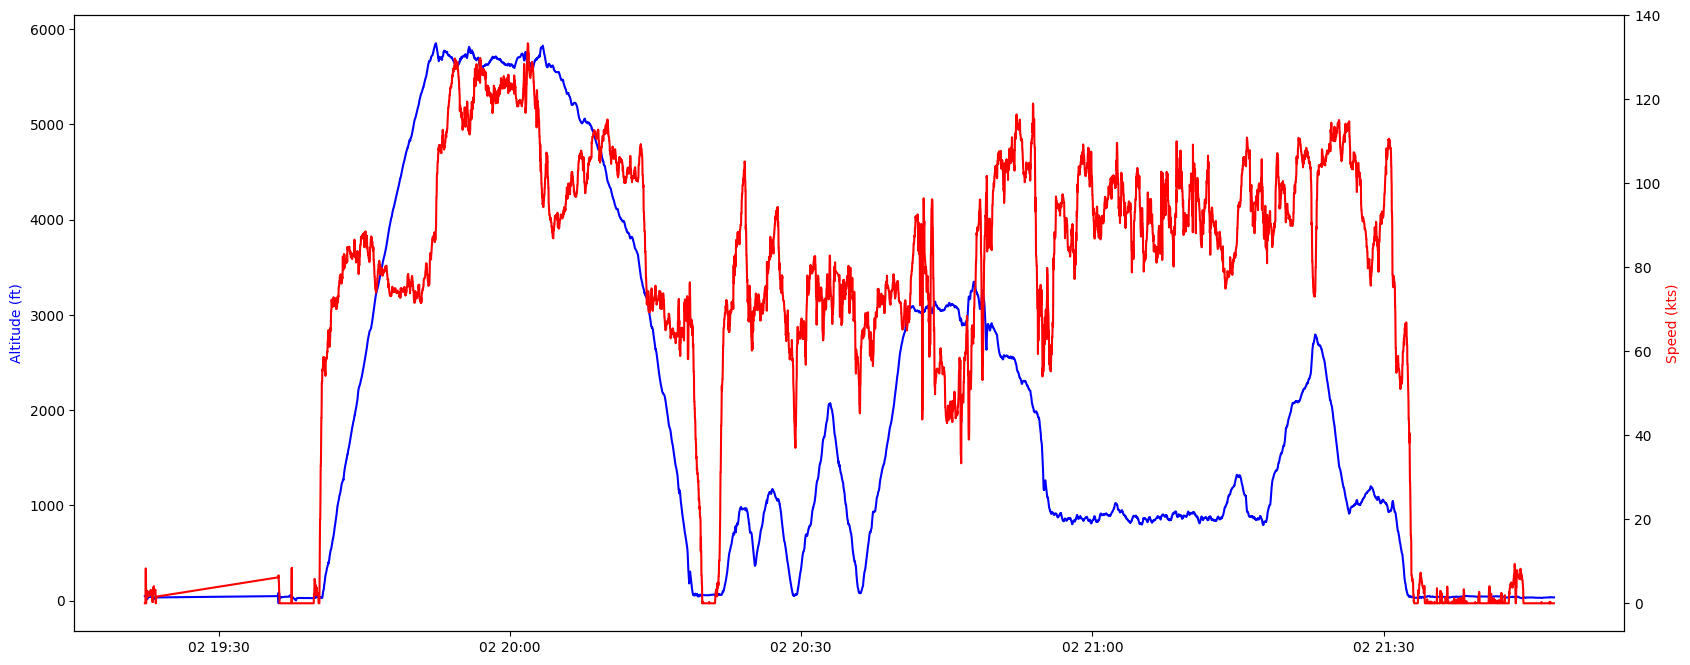

In [37]:
import matplotlib.pyplot as plt
# data['altitude'] = data['altitude'].interpolate(method='linear')
# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot the 'altitude' column on the first y-axis
ax1.plot(data['altitude'], color='blue')
ax1.set_ylabel('Altitude (ft)', color='blue')

# Create a second y-axis object
ax2 = ax1.twinx()

# # Plot the 'speed_kts' column on the second y-axis
ax2.plot(data['speed_kts'], color='red')
ax2.set_ylabel('Speed (kts)', color='red')

# Show the plot
plt.show()

In [38]:
for i in range(6060,6150, 5):
    if data['altitude'][i] > 800 and data['altitude'][i] < 1000:
        print('i=',i)
        print(data['altitude'][i])
        print("crs", data['course'][i])
        print("lat" , data['latitude'][i], end=" ")
        print("lon", data['longitude'][i])

i= 6060
877.61
crs 241.88
lat 38.91455 lon -76.183008
i= 6065
886.42
crs 214.1
lat 38.912997 lon -76.185148
i= 6070
885.03
crs 204.61
lat 38.911053 lon -76.186443
i= 6075
865.98
crs 181.41
lat 38.908868 lon -76.186598
i= 6080
879.58
crs 160.66
lat 38.906813 lon -76.185605
i= 6085
866.98
crs 133.95
lat 38.905349 lon -76.183752
i= 6090
850.58
crs 110.74
lat 38.904315 lon -76.181294
i= 6095
849.64
crs 91.41
lat 38.903922 lon -76.178497
i= 6100
852.79
crs 79.45
lat 38.904229 lon -76.175647
i= 6105
860.77
crs 46.76
lat 38.905652 lon -76.173507
i= 6110
850.83
crs 22.5
lat 38.907566 lon -76.171937
i= 6115
866.24
crs 359.3
lat 38.909822 lon -76.17142
i= 6120
886.03
crs 343.48
lat 38.912022 lon -76.172047
i= 6125
866.31
crs 318.16
lat 38.913838 lon -76.173786
i= 6130
841.29
crs 293.55
lat 38.915001 lon -76.17627
i= 6135
803.89
crs 272.46
lat 38.915298 lon -76.179093
i= 6140
805.8
crs 251.02
lat 38.914755 lon -76.181722
i= 6145
829.99
crs 228.87
lat 38.913459 lon -76.183844


C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\2072740133.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['altitude'][i] > 800 and data['altitude'][i] < 1000:
C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\2072740133.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(data['altitude'][i])
C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\2072740133.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("cr

In [39]:
import numpy as np
change = 340 - 0
if abs(change) > 180:
    change = (360 - abs(change)) * np.sign(change) * -1

print(change)

-20


In [40]:
import numpy as np

count = 0 
last = 0
increasing = True
start = 0

turn_segments = []

for i in range(5,len(data) - 5, 5):
    if data['altitude'][i] > 800 and data['altitude'][i] < 1000:

        change = float(data['course'][i]) - float(data['course'][last])

        # check if the change is greater than 180
        # if it is, then we need to change the sign of the change
        if abs(change) > 180:
            change = (360 - abs(change)) * np.sign(change) * -1
        if change > 0:
            if increasing == False:
                count = 0
                increasing = True
                start = i
                # start = last
            count += 1
        else:
            if increasing == True:
                count = 0
                increasing = False
                start = i
            count += 1
        if count >= 20:
            if abs(data["longitude"][i] - data["longitude"][start]) < 0.01 and abs(data["latitude"][i] - data["latitude"][start]) < 0.01:
                turn_segments.append([start, i])
            count = 0
            start = i
        last = i
    

turn_segments   


C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\55500289.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['altitude'][i] > 800 and data['altitude'][i] < 1000:
C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\55500289.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  change = float(data['course'][i]) - float(data['course'][last])
C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\55500289.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

[[5520, 5615], [5615, 5715], [5715, 5815], [6045, 6140]]

In [41]:
import requests

def get_elevations():
    elevations = []
    queue = coords
    # print(queue)
    # while len(queue) > 0:

    while len(queue) > 0:
        print(queue)
        print(len(queue))
        start = True
        request = queue[:100]
        locations = ''
        for coord in request:
            lat = coord.split(" ")[1]
            lon = coord.split(" ")[0]
            if not start:
                locations = locations + f'|{lat},{lon}'
            else:
                locations = locations + f'{lat},{lon}'
                start = False
            queue.pop(0)
        print(locations)

        base_url = "https://api.opentopodata.org/v1/ned10m"
        params = {
        'locations': locations,
        'format': 'json'
        }

        try:
            response = requests.get(base_url, params=params)
            data = response.json()
        # print(data)
        # print(response.status_code)
        # Check if the request was successful
            if response.status_code == 200 and 'results' in data:
                for elev in data['results']:
                    elevations.append(float(elev['elevation'] * 3.24))
            else:
                print(f'Error: {data["error"]["message"]}')
        except Exception as e:
            print(f'Error: {str(e)}')
    print(len(elevations))
    return elevations

# elevations = get_elevations()
# print(elevations)

In [42]:
segments = []
start = 0
end = 0
takeoffs = 0
landings = 0
# currentlyAirborne = data['height'][0] > 75
# lastAirborne = True
# count = 0
i = 0
count = 0
while i < len(data):
    count += 1
    if (data['height'][i] > 500):
        i += 60
        continue

    if (data['height'][i] < 25):
        if i+15 >= len(data):
            end = data['speed_kts'][len(data)-1]
        else:
            end = data['speed_kts'][i+15]
        start = data['speed_kts'][i]
        if data['height'][i] < 25:
            if end - start > 25 and start < 25 and 50 < end < 100:
                segments.append({"start":i, "end": i + 15,   "status": "takeoff", "score" : "NA"})
                takeoffs += 1
                i += 15
                continue
    i += 5
print(count/len(data))
i = 0
count = 0
while i < len(data):
    count += 1
    if (data['height'][i] > 500):
        i += 60
        continue

    if (data['height'][i] < 25):
        if i+20 >= len(data):
            end = data['speed_kts'][len(data)-1]
        else:
            end = data['speed_kts'][i+20]
        start = data['speed_kts'][i]

        if (start - end > 15 and start < 100 and end < 25 ):
            segments.append({"start":i, "end": i + 15,   "status": "landing" ,"score" : "NA"})
            landings += 1
            i += 60
            continue
    i += 5

print(count/len(data))

# sort segments by starting point. 
segments.sort(key=lambda x: x["start"])

startPoint = 0
i = 0
while i < len(segments):
    # just tookoff, last segment was taxi
    if segments[i]["status"] == "takeoff":
        segments.insert(i, {"start":startPoint, "end": segments[i]["start"],   "status": "taxi", "score" : "NA"})
        startPoint = segments[i + 1]["end"]
    # just landed, last segment was airborne
    elif segments[i]["status"] == "landing":
        segments.insert(i, {"start":startPoint, "end": segments[i]["start"],   "status": "airborne", "score" : "NA"})
        startPoint = segments[i + 1]["end"]
    i += 2

if len(segments) != 0:
    segments.append({"start":segments[-1]["end"], "end":len(data),   "status": "taxi", "score" : "NA"})
else:
    segments.append({"start":0, "end":len(data),   "status": "airborne", "score" : "NA"})

print(segments)

C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\1349819850.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (data['height'][i] > 500):


0.11909262759924386
0.11682419659735349
[{'start': 0, 'end': 325, 'status': 'taxi', 'score': 'NA'}, {'start': 325, 'end': 340, 'status': 'takeoff', 'score': 'NA'}, {'start': 340, 'end': 2660, 'status': 'airborne', 'score': 'NA'}, {'start': 2660, 'end': 2675, 'status': 'landing', 'score': 'NA'}, {'start': 2675, 'end': 2795, 'status': 'taxi', 'score': 'NA'}, {'start': 2795, 'end': 2810, 'status': 'takeoff', 'score': 'NA'}, {'start': 2810, 'end': 7030, 'status': 'airborne', 'score': 'NA'}, {'start': 7030, 'end': 7045, 'status': 'landing', 'score': 'NA'}, {'start': 7045, 'end': 7935, 'status': 'taxi', 'score': 'NA'}]


C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\1349819850.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (data['height'][i] < 25):
C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\1349819850.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end = data['speed_kts'][i+15]
C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\1349819850.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = data['speed_kts'][i]
C:\Use

In [43]:
### Scoring takeoffs and landings

scoreArr = []

# calculate score for segments that are out of bounds.
def calculateScore (diff):
    score = 100 * np.exp(-0.12 * diff)
    return score
print(len(data))
for i in range(0, len(segments), 1):
        score = 100
        if segments[i]['status'] in ("takeoff", "landing"):
                avg = sum(data["course"][segments[i]["start"]:segments[i]["end"]])/(segments[i]["end"]-segments[i]["start"])
                for j in range(segments[i]['start'], segments[i]['end'], 1):
                        course = data['course'][j]
                        curScore = calculateScore(abs(course - avg))
                        score = (score + curScore) / 2
                # scoreArr.append(score)
                segments[i]['score'] = str(score)
        if (segments[i]['status'] not in ("airborne")):
                data.drop(data.index[segments[i]['start']:segments[i]["end"]], inplace=True)

print(len(data))
print(scoreArr)
print(len(scoreArr))

7935
7045
[85.61961595231122, 38.35665335093441, 90.86055933127012, 0.6664336727021821]
4


C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\146617202.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  course = data['course'][j]


In [44]:
# touch and go

def touch_and_go (start, end):
    if ((data["height"][start] > 30) and (data["height"][end] > 30) and (data["height"][(end-start)//2+start] < 25)):
        return 1
    
touch_and_go_segments = []
i = 0
while i < len(data):
    if (i < len(data)-40):
        if (touch_and_go(i, i+40)):
            touch_and_go_segments.append({"start": i,"end": i+40,"status": "touch&go","score": "NA"})
            i += 40
            continue

    i += 1
i = 0
print(touch_and_go_segments)

C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\2725766851.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ((data["height"][start] > 30) and (data["height"][end] > 30) and (data["height"][(end-start)//2+start] < 25)):


[{'start': 2755, 'end': 2795, 'status': 'touch&go', 'score': 'NA'}, {'start': 3130, 'end': 3170, 'status': 'touch&go', 'score': 'NA'}]


In [47]:
# score touch and go

def calculateScore (diff):
    score = 100 * np.exp(-0.12 * diff)
    return score
print(len(data))
for i in range(0, len(touch_and_go_segments), 1):
        score = 100
        if touch_and_go_segments[i]['status'] in ("touch&go"):
                avg = sum(data["course"][touch_and_go_segments[i]["start"]:touch_and_go_segments[i]["end"]])/(touch_and_go_segments[i]["end"]-touch_and_go_segments[i]["start"])
                for j in range(touch_and_go_segments[i]['start'], touch_and_go_segments[i]['end'], 1):
                        course = data['course'][j]
                        curScore = calculateScore(abs(course - avg))
                        score = (score + curScore) / 2
                # scoreArr.append(score)
                touch_and_go_segments[i]['score'] = str(score)
        if (touch_and_go_segments[i]['status'] not in ("airborne")):
                data.drop(data.index[touch_and_go_segments[i]['start']:touch_and_go_segments[i]["end"]], inplace=True)

print(touch_and_go_segments)

6885
[{'start': 2755, 'end': 2795, 'status': 'touch&go', 'score': '0.0016451994984173226'}, {'start': 3130, 'end': 3170, 'status': 'touch&go', 'score': '75.08434392410706'}]


C:\Users\ben12\AppData\Local\Temp\ipykernel_31112\2461437712.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  course = data['course'][j]


In [ ]:
# Stall speed
Vso = 41
start = -1
last = -1
slow_flight_segments = []
for i in range(0, len(data), 50):
    # elev = elevations[i]
    difference = abs(data["altitude"][i])
    # print(difference)
    ground_speed = data['speed_kts'][i]
    slow_flt = Vso + 10
    near_stall_speed = abs(ground_speed - slow_flt)

    # if we have been long enough since our last data point, end the segment. 
    if (i - last > 100 or i >= len(data) - 100) and start != -1:
        slow_flight_segments.append([start, last])
        start = -1

    if difference >= 1500 and near_stall_speed <= 10:
        if start == -1:
            start = i
        last = i
        print('idx ' , i, ground_speed, " kts ground speed " , data['latitude'][i], data['longitude'][i])


print(slow_flight_segments)   


for slow_segment in slow_flight_segments:
    # get index of splice, put it in at the end. 
    index = -1
    for i in range(len(segments)):
        if segments[i]['end'] >= slow_segment[0]:
            index = i
            break
        else:
            continue

    if index != -1:
        # if the overall segment is greater than ours, then we need to split it.
        if segments[index]['end'] > slow_segment[1]:
            segments.insert(index + 1, {"start":slow_segment[1], "end":segments[index]["end"], "status": segments[index]["status"]})
        else:
            segments[index + 1]["start"] = slow_segment[1]

        segments[index]['end'] = slow_segment[0]
        segments.insert(index + 1, {"start":slow_segment[0], "end":slow_segment[1], "status": "slow_flight"})
        index = -1
# find the segmen t that the start is in, end it early. Find the segment that the end is in, start it late. 
    
print(segments)

idx  4100 59.07  kts ground speed  38.856586 -75.752226
idx  4150 45.27  kts ground speed  38.857969 -75.765431
idx  4200 44.73  kts ground speed  38.855329 -75.776203
idx  4250 57.87  kts ground speed  38.860223 -75.789436
idx  4700 59.35  kts ground speed  38.905478 -75.984417
[[4100, 4250], [4700, 4700]]
[{'start': 0, 'end': 325, 'status': 'taxi', 'score': 'NA'}, {'start': 325, 'end': 340, 'status': 'takeoff', 'score': '86.61649263153217'}, {'start': 340, 'end': 2660, 'status': 'airborne', 'score': 'NA'}, {'start': 2660, 'end': 2675, 'status': 'landing', 'score': '0.003081795609254544'}, {'start': 2675, 'end': 2795, 'status': 'taxi', 'score': 'NA'}, {'start': 2795, 'end': 2810, 'status': 'takeoff', 'score': '83.65775877182307'}, {'start': 2810, 'end': 4100, 'status': 'airborne', 'score': 'NA'}, {'start': 4100, 'end': 4250, 'status': 'slow_flight'}, {'start': 4250, 'end': 4700, 'status': 'airborne'}, {'start': 4700, 'end': 4700, 'status': 'slow_flight'}, {'start': 4700, 'end': 7030, 

C:\Users\ben12\AppData\Local\Temp\ipykernel_26196\2750884504.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = abs(data["altitude"][i])
C:\Users\ben12\AppData\Local\Temp\ipykernel_26196\2750884504.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ground_speed = data['speed_kts'][i]
C:\Users\ben12\AppData\Local\Temp\ipykernel_26196\2750884504.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('idx ' , i, gro

<Axes: xlabel='longitude', ylabel='latitude'>

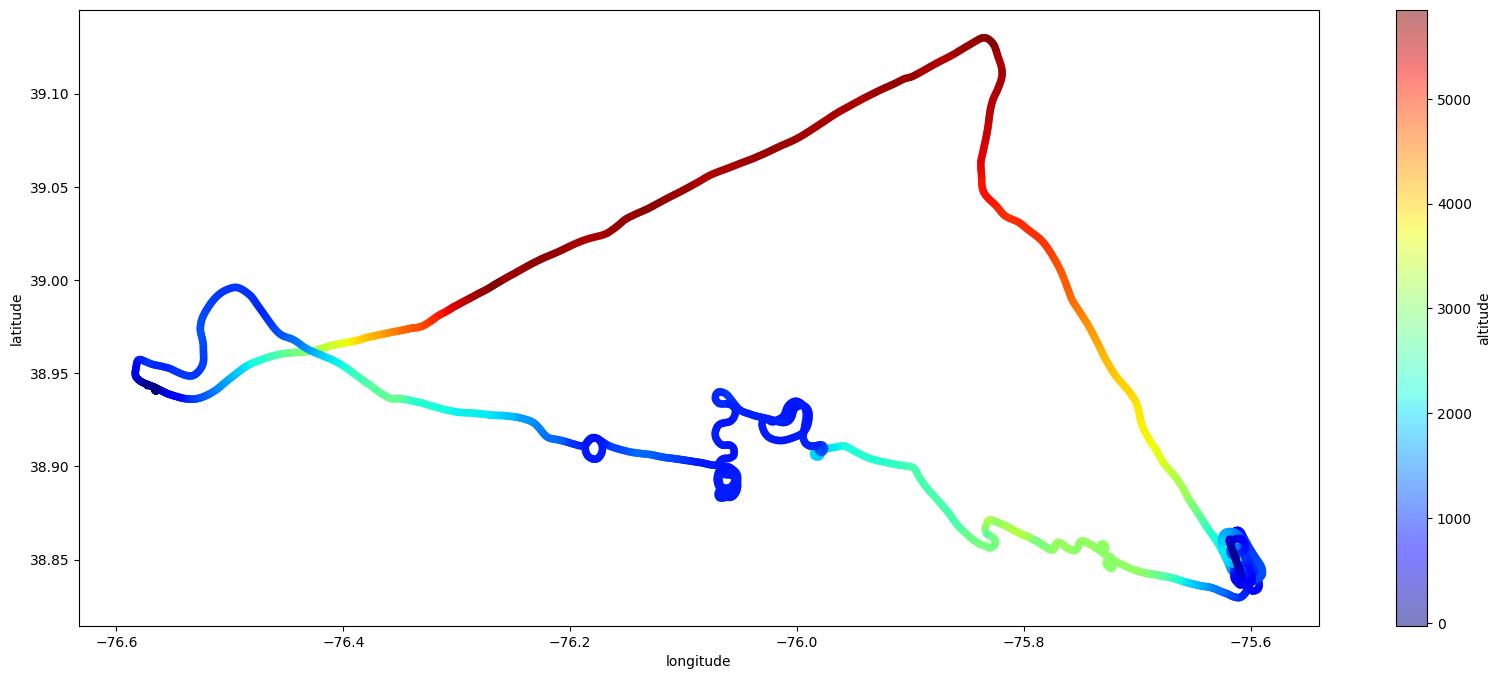

In [ ]:
data.plot(x='longitude', y='latitude', kind='scatter', figsize=(20, 8),
          alpha=0.5, c='altitude', cmap=plt.get_cmap('jet'), colorbar=True)


In [ ]:

Vr = 50
Vso = 41
Vs1 = 47
Vx = 59
Vy = 73
Vsw = 50
Vref = 60
Vne = 160
Vno = 128
Vmxt = 10

